# League of Legends Data Analisys
---

## Introduction

League of Legends is a MOBA game where the blue and red teams, with five champions each, have the goal of destroying the enemy Nexus inside their base.

The map has three lanes separated by two jungles. The path to the enemy base is guarded by towers and minions that spawns on the base from time to time. The jungle is populated by neutral monsters that provide the players with resources and buffs when killed.

Killing enemy champions, minions and monsters as well as destroying enemy structures provide the player with resources (mainly gold and experience). An resource advantage over the enemy team makes it easier to siege their base and destroy their Nexus.

## Problem

The objective of this work is to predict the outcome of a League match, as well as extracting some insights about the game, using the data from the first 10 minutes of aprox. 10k games, found in [this](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min) dataset.

## Data

Each entry in the data contains 39 columns: the blueWins column indicates the matches were the blue team won, and is the target value. The rest of the data are 19 features for each team, with information such as number of kills, deaths, assists, etc.

In [99]:
%%capture
# Getting the data
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min");

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv('./league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
df.drop('gameId', axis=1, inplace=True) # Unique id not useful for classification models
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [4]:
df.groupby('blueWins').size()

blueWins
0    4949
1    4930
dtype: int64

In [19]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


We can verify that the dataset is balanced and there are no null values to treat. Next it will be checked if there are any correlation between the features.

Some of the data should perfectly correlate:

- Blue and red first blood;
- The number of blue team kills and deaths are equal to the number of red team deaths and kills, respectively;
- The amount of gold/CS per minute is the total amount divided by 10;
- The gold and experience difference for each team have the same absolute value.

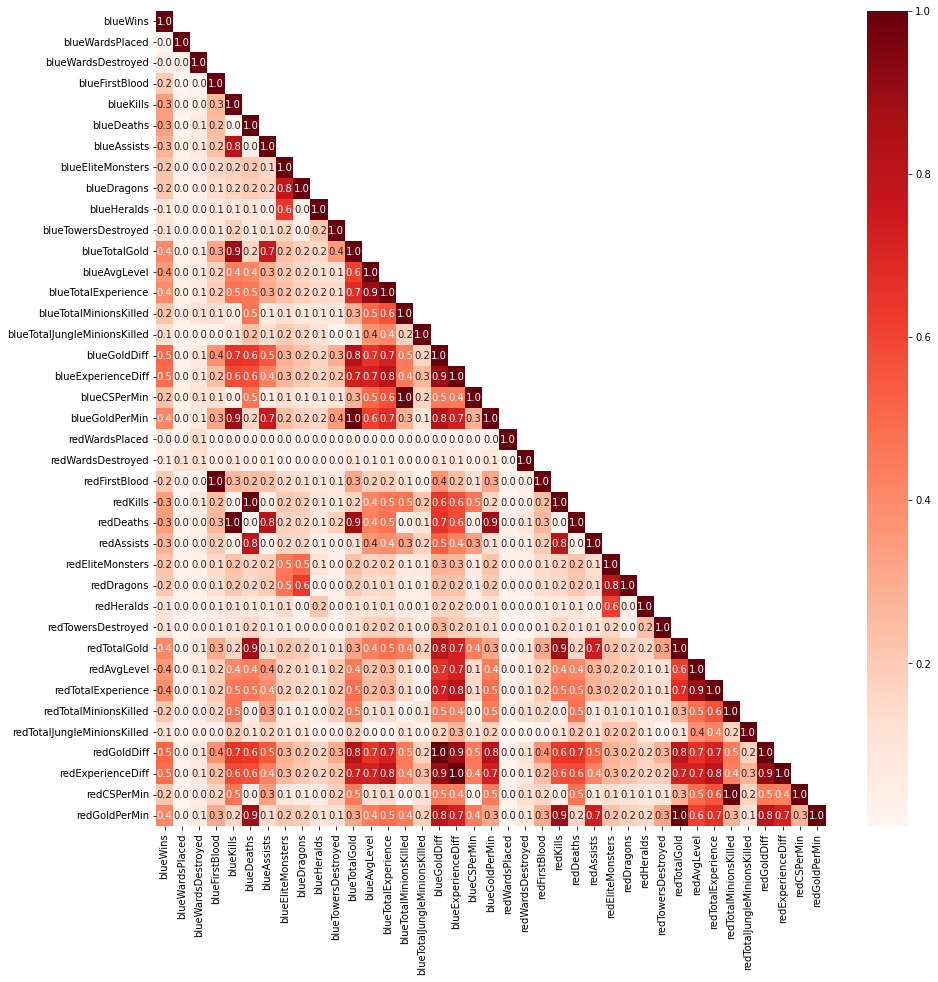

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
cor = df.corr().abs()
np.tril(np.ones(cor.shape)).astype(bool)
cor = cor.where(np.tril(np.ones(cor.shape)).astype(bool))
sns.heatmap(cor, xticklabels=True, yticklabels=True, annot=True, fmt='.1f', cmap='Reds');

Now we take a look at some of the features that have a high correlation with our target value

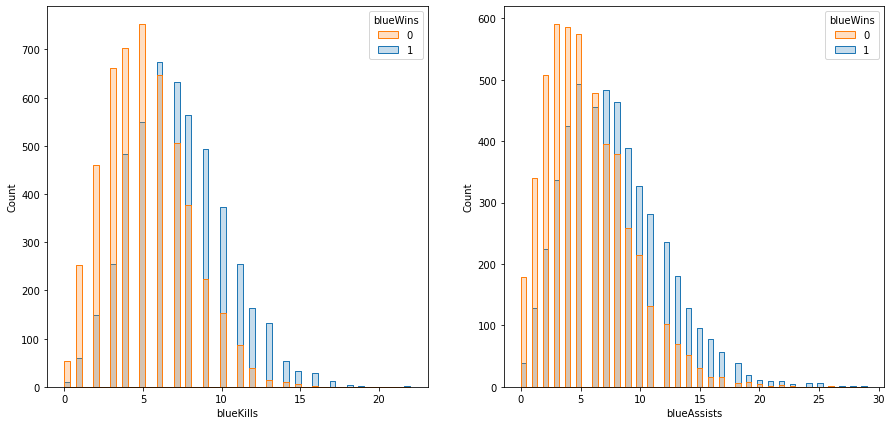

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(df, x="blueKills", hue="blueWins", element="step", palette={0: "C1", 1: "C0"}, ax=axs[0]);
sns.histplot(df, x="blueAssists", hue="blueWins", element="step", palette={0: "C1", 1: "C0"}, ax=axs[1]);

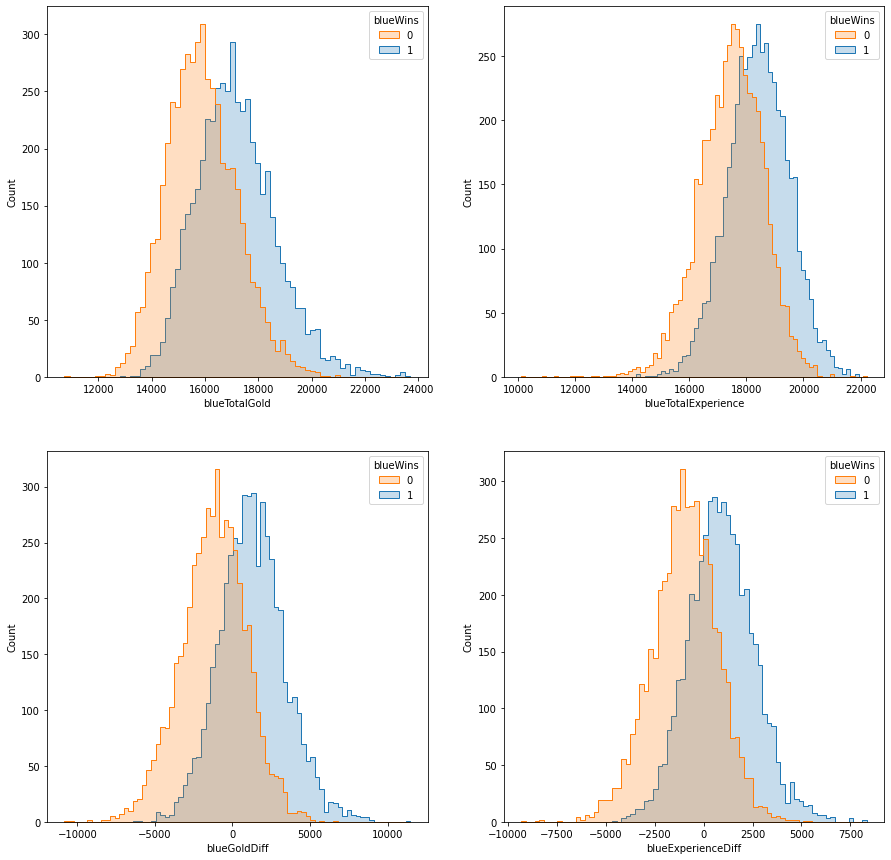

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(df, x="blueTotalGold", hue="blueWins", element="step", palette={0: "C1", 1: "C0"}, ax=axs[0,0]);
sns.histplot(df, x="blueTotalExperience", hue="blueWins", element="step", palette={0: "C1", 1: "C0"}, ax=axs[0,1]);
sns.histplot(df, x="blueGoldDiff", hue="blueWins", element="step", palette={0: "C1", 1: "C0"}, ax=axs[1,0]);
sns.histplot(df, x="blueExperienceDiff", hue="blueWins", element="step", palette={0: "C1", 1: "C0"}, ax=axs[1,1]);

Note that even when looking at the features of only one team, there is a threshold on these features after which the victory of the other team becomes almost impossible (e.g.: The blue team wins almost all matches when they got at least 15 kills or around 21k gold in the first 10 minutes).

---

### Questions / Experiments

1. Can we predict the outcome of the match? - Using data as is (except the diffs);
2. Would using only differences make a better model? - Using only the difference between each team's data;
3. How well can we predict the outcome of the match without looking at the other team? - Using only the data from a single team;
---

## Models

For each experiment we will train a k-Nearest Neighbors, Decision Tree, Random Forest and Support-vector Machine classifiers.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

In [9]:
def fit_report(model, params, X_train, y_train, X_test, y_test):
    gscv = GridSearchCV(model, params, n_jobs = -1)
    gscv.fit(X_train, y_train)
    
    print('### TRAINING DATA CLASSIFICATION REPORT ###')
    y_train_predicted = gscv.predict(X_train)
    print(classification_report(y_train, y_train_predicted, digits=4))
    print('### TEST DATA CLASSIFICATION REPORT ###')
    y_predicted = gscv.predict(X_test)
    print(classification_report(y_test, y_predicted, digits=4))
    
    print(gscv.best_params_)
    
    return gscv

### Experiment #1

In [10]:
y1 = df['blueWins']

X1 = df.drop([
     # Colinearity
    'redDeaths', 'redKills', 'redFirstBlood', 'blueGoldPerMin', 'redGoldPerMin', 'blueCSPerMin', 'redCSPerMin',
     # Diffs
    'blueGoldDiff', 'redGoldDiff', 'blueExperienceDiff', 'redExperienceDiff',
    'blueWins' # Target
], axis=1)

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [12]:
knn_params = {'n_neighbors': np.arange(1, 101)}
knn = fit_report(KNeighborsClassifier(), knn_params, X1_train, y1_train, X1_test, y1_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7152    0.7428    0.7288      3713
           1     0.7312    0.7029    0.7168      3696

    accuracy                         0.7229      7409
   macro avg     0.7232    0.7229    0.7228      7409
weighted avg     0.7232    0.7229    0.7228      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7175    0.7500    0.7334      1236
           1     0.7377    0.7042    0.7206      1234

    accuracy                         0.7271      2470
   macro avg     0.7276    0.7271    0.7270      2470
weighted avg     0.7276    0.7271    0.7270      2470

{'n_neighbors': 96}


In [13]:
tree_params = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}
dtc = fit_report(tree.DecisionTreeClassifier(), tree_params, X1_train, y1_train, X1_test, y1_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7222    0.7695    0.7451      3713
           1     0.7521    0.7027    0.7265      3696

    accuracy                         0.7361      7409
   macro avg     0.7371    0.7361    0.7358      7409
weighted avg     0.7371    0.7361    0.7358      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6874    0.7524    0.7184      1236
           1     0.7261    0.6572    0.6899      1234

    accuracy                         0.7049      2470
   macro avg     0.7067    0.7048    0.7042      2470
weighted avg     0.7067    0.7049    0.7042      2470

{'criterion': 'entropy', 'max_depth': 5}


In [14]:
forest_params = { 
    'criterion':['gini','entropy'],
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5],
}
forest = fit_report(RandomForestClassifier(), forest_params, X1_train, y1_train, X1_test, y1_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7458    0.7603    0.7530      3713
           1     0.7544    0.7397    0.7470      3696

    accuracy                         0.7500      7409
   macro avg     0.7501    0.7500    0.7500      7409
weighted avg     0.7501    0.7500    0.7500      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7162    0.7249    0.7205      1236
           1     0.7211    0.7123    0.7167      1234

    accuracy                         0.7186      2470
   macro avg     0.7187    0.7186    0.7186      2470
weighted avg     0.7187    0.7186    0.7186      2470

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [15]:
svm_params = {
    "kernel": ["rbf"],
    "gamma": [1e-3, 1e-4], 
    "C": [1, 10, 100, 1000],
}
svmc = fit_report(svm.SVC(), svm_params, X1_train, y1_train, X1_test, y1_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7268    0.7417    0.7342      3713
           1     0.7351    0.7200    0.7274      3696

    accuracy                         0.7309      7409
   macro avg     0.7310    0.7308    0.7308      7409
weighted avg     0.7310    0.7309    0.7308      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7182    0.7403    0.7291      1236
           1     0.7316    0.7091    0.7202      1234

    accuracy                         0.7247      2470
   macro avg     0.7249    0.7247    0.7246      2470
weighted avg     0.7249    0.7247    0.7246      2470

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Notes on Experiment #1

We note that the results of each model were quite similar. None of them show signs of overfitting and all of them show an accuracy of at least 70%.

The best model was the knn, with an accuracy of 72.71% and the worst model was the decision tree, with an accuracy of 70.49%.

---

### Experiment #2

In [16]:
y2 = df['blueWins']

blue = df.filter(like='blue').drop(['blueWins', 'blueGoldDiff', 'blueExperienceDiff',
                                    'blueGoldPerMin', 'blueCSPerMin', 'blueDeaths'], axis=1)
red = df.filter(like='red').drop(['redGoldDiff', 'redExperienceDiff', 'redGoldPerMin',
                                  'redCSPerMin', 'redDeaths'], axis=1)

X2 = blue - red.values
X2.rename(columns=lambda x: x[4:]+'Diff', inplace=True)

In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X2_train)

X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [18]:
knn_params = {'n_neighbors': np.arange(1, 101)}
knn2 = fit_report(KNeighborsClassifier(), knn_params, X2_train, y2_train, X2_test, y2_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7226    0.7423    0.7323      3713
           1     0.7338    0.7137    0.7236      3696

    accuracy                         0.7280      7409
   macro avg     0.7282    0.7280    0.7280      7409
weighted avg     0.7282    0.7280    0.7280      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7168    0.7290    0.7228      1236
           1     0.7238    0.7115    0.7176      1234

    accuracy                         0.7202      2470
   macro avg     0.7203    0.7202    0.7202      2470
weighted avg     0.7203    0.7202    0.7202      2470

{'n_neighbors': 94}


In [19]:
tree_params = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}
dtc2 = fit_report(tree.DecisionTreeClassifier(), tree_params, X2_train, y2_train, X2_test, y2_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6985    0.8047    0.7478      3713
           1     0.7684    0.6510    0.7048      3696

    accuracy                         0.7280      7409
   macro avg     0.7335    0.7279    0.7263      7409
weighted avg     0.7334    0.7280    0.7264      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6812    0.7969    0.7345      1236
           1     0.7549    0.6264    0.6847      1234

    accuracy                         0.7117      2470
   macro avg     0.7180    0.7117    0.7096      2470
weighted avg     0.7180    0.7117    0.7096      2470

{'criterion': 'entropy', 'max_depth': 3}


In [20]:
forest_params = { 
    'criterion':['gini','entropy'],
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5],
}
forest2 = fit_report(RandomForestClassifier(), forest_params, X2_train, y2_train, X2_test, y2_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7390    0.7450    0.7420      3713
           1     0.7417    0.7357    0.7387      3696

    accuracy                         0.7403      7409
   macro avg     0.7403    0.7403    0.7403      7409
weighted avg     0.7403    0.7403    0.7403      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7210    0.7298    0.7254      1236
           1     0.7260    0.7172    0.7216      1234

    accuracy                         0.7235      2470
   macro avg     0.7235    0.7235    0.7235      2470
weighted avg     0.7235    0.7235    0.7235      2470

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}


In [21]:
svm_params = {
    "kernel": ["rbf"],
    "gamma": [1e-3, 1e-4], 
    "C": [1, 10, 100, 1000],
}
svmc2 = fit_report(svm.SVC(), svm_params, X2_train, y2_train, X2_test, y2_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7338    0.7379    0.7359      3713
           1     0.7352    0.7311    0.7331      3696

    accuracy                         0.7345      7409
   macro avg     0.7345    0.7345    0.7345      7409
weighted avg     0.7345    0.7345    0.7345      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7218    0.7346    0.7281      1236
           1     0.7294    0.7164    0.7228      1234

    accuracy                         0.7255      2470
   macro avg     0.7256    0.7255    0.7255      2470
weighted avg     0.7256    0.7255    0.7255      2470

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Notes on Experiment #2

The results for the 2nd experiment were generally better than the first, but by a small margin.

The best model, now the svm, scored an accuracy of 72.55%, a little lower than our previous 72.71%. The worst model was again the decision tree, with an accuracy of 71.17%.

This approach should be useful for dealing with more points or more complex algorithms, for it retains the original information with only a half of the amount of features.

---

### Experiment #3

In [73]:
y3 = df['blueWins']

X3 = df.filter(like='blue').drop(['blueWins', 'blueGoldDiff', 'blueExperienceDiff',
                                    'blueGoldPerMin', 'blueCSPerMin', 'blueDeaths'], axis=1)

In [74]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X3_train)

X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [75]:
knn_params = {'n_neighbors': np.arange(1, 101)}
knn3 = fit_report(KNeighborsClassifier(), knn_params, X3_train, y3_train, X3_test, y3_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6953    0.7204    0.7077      3713
           1     0.7086    0.6829    0.6955      3696

    accuracy                         0.7017      7409
   macro avg     0.7020    0.7017    0.7016      7409
weighted avg     0.7020    0.7017    0.7016      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6864    0.7047    0.6954      1236
           1     0.6961    0.6775    0.6867      1234

    accuracy                         0.6911      2470
   macro avg     0.6912    0.6911    0.6910      2470
weighted avg     0.6912    0.6911    0.6910      2470

{'n_neighbors': 75}


In [76]:
tree_params = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}
dtc3 = fit_report(tree.DecisionTreeClassifier(), tree_params, X3_train, y3_train, X3_test, y3_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7046    0.7132    0.7089      3713
           1     0.7083    0.6997    0.7040      3696

    accuracy                         0.7064      7409
   macro avg     0.7065    0.7064    0.7064      7409
weighted avg     0.7065    0.7064    0.7064      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6789    0.6893    0.6841      1236
           1     0.6840    0.6734    0.6786      1234

    accuracy                         0.6814      2470
   macro avg     0.6814    0.6814    0.6814      2470
weighted avg     0.6814    0.6814    0.6814      2470

{'criterion': 'entropy', 'max_depth': 6}


In [77]:
forest_params = { 
    'criterion':['gini','entropy'],
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5],
}
forest3 = fit_report(RandomForestClassifier(), forest_params, X3_train, y3_train, X3_test, y3_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.7120    0.7037    0.7078      3713
           1     0.7058    0.7140    0.7099      3696

    accuracy                         0.7089      7409
   macro avg     0.7089    0.7089    0.7089      7409
weighted avg     0.7089    0.7089    0.7089      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6946    0.6917    0.6931      1236
           1     0.6925    0.6953    0.6939      1234

    accuracy                         0.6935      2470
   macro avg     0.6935    0.6935    0.6935      2470
weighted avg     0.6935    0.6935    0.6935      2470

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}


In [78]:
svm_params = {
    "kernel": ["rbf"],
    "gamma": [1e-3, 1e-4], 
    "C": [1, 10, 100, 1000],
}
svmc3 = fit_report(svm.SVC(), svm_params, X3_train, y3_train, X3_test, y3_test)

### TRAINING DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6894    0.7156    0.7023      3713
           1     0.7030    0.6761    0.6893      3696

    accuracy                         0.6959      7409
   macro avg     0.6962    0.6959    0.6958      7409
weighted avg     0.6962    0.6959    0.6958      7409

### TEST DATA CLASSIFICATION REPORT ###
              precision    recall  f1-score   support

           0     0.6896    0.7063    0.6978      1236
           1     0.6985    0.6815    0.6899      1234

    accuracy                         0.6939      2470
   macro avg     0.6940    0.6939    0.6939      2470
weighted avg     0.6940    0.6939    0.6939      2470

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Notes on Experiment #3

The overall loss of accuracy from the other experiments was about 3%, so it is still possible to get a pretty good estimation of the match result even without looking at both of the teams data.

The best model was the svm with an accuracy of 69.39%, the worst case was the decision tree with 68.14%.

---

## Insights

Now we're going to take a look at the feature importances from the random forest classifiers to discover what aspects of the game are more important, early on, to ensure the victory of the team.

In [96]:
features1 = pd.Series(forest.best_estimator_.feature_importances_, index=X1.columns).sort_values(ascending=False)
features2 = pd.Series(forest2.best_estimator_.feature_importances_, index=X2.columns).sort_values(ascending=False)
features3 = pd.Series(forest3.best_estimator_.feature_importances_, index=X3.columns).sort_values(ascending=False)

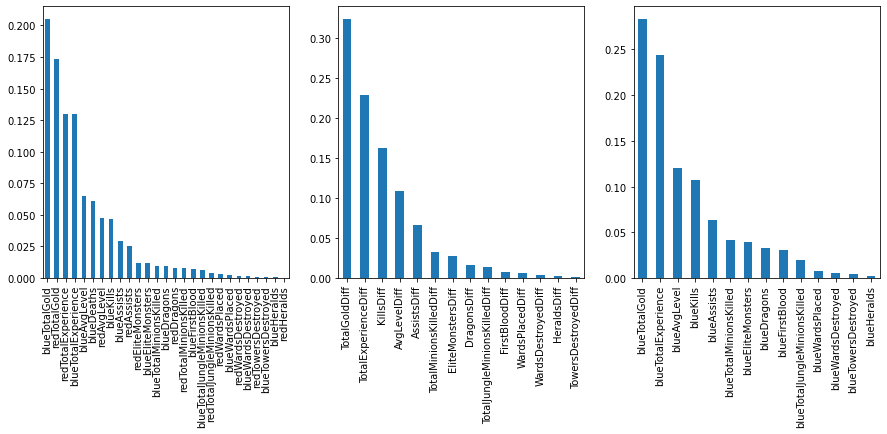

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features1.plot.bar(ax=axs[0]);
features2.plot.bar(ax=axs[1]);
features3.plot.bar(ax=axs[2]);

As gold, experience and levels are basically a result of everything someone does in the game, it is expected that they have a great importance to the result of the match.

Next, those values will be dropped to better analyze the importance of the more direct aspects of the game.

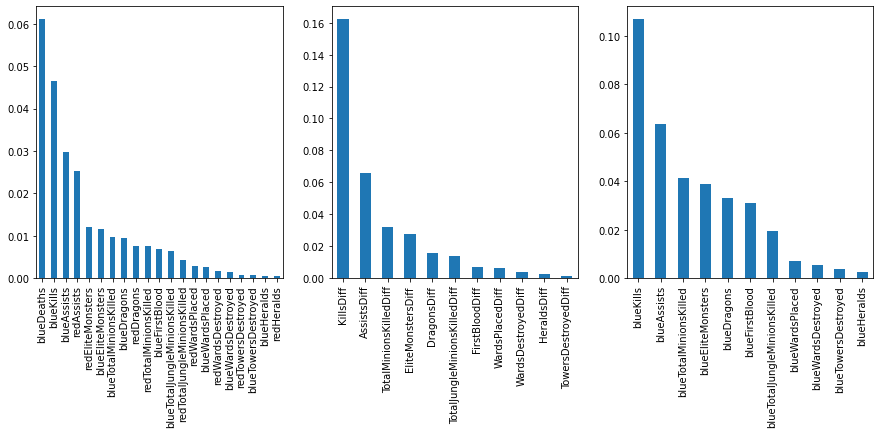

In [98]:
features1 = features1.drop(['blueTotalGold', 'redTotalGold', 'blueTotalExperience', 'redTotalExperience',
                            'blueAvgLevel', 'redAvgLevel'])
features2 = features2.drop(['TotalGoldDiff', 'TotalExperienceDiff', 'AvgLevelDiff'])
features3 = features3.drop(['blueTotalGold', 'blueTotalExperience', 'blueAvgLevel'])
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features1.plot.bar(ax=axs[0]);
features2.plot.bar(ax=axs[1]);
features3.plot.bar(ax=axs[2]);

We can see that securing early games kills and assists and avoiding deaths are very impactful to the outcome of the match, followed by killing elite monsters, dragons and having a CS advantage.

When looking at a single team we can see that the amount of minions/monsters/dragons killed as well as drawing the first blood become more important signals when predicting the outcome.

---

## Conclusion and Future Work

Although League is a very complex game with many variables and win conditions, the data was enough to train pretty accurate classifiers. Also, the importance of features extracted by the random forest classifier corroborate with the common sense assumptions players have about the game.

Aditional information about the composition of the teams should help to improve the classifiers, as counter picks (picking a champion that has an advantage over one already picked by the enemy team) and the presence of champions that are weak at the early game but stronger at the latter stages (or vice versa) should have a big impact to the outcome of the match.

Similar datasets for low elo and competitive matchs may provide interesting insights about how the dynamics of the game change across different levels of players.